# Implementation of Weighted Delta-Tracking with Scattering in the Serpent 2 Monte Carlo Code

## Analysis Notebook

This notebook requires the following repositories:

1. `WDT_Analysis` containing the analysis module.
2. `wdt_data` containing the actual FOM run data.
3. `wdt_cpu` containing data used to calculate Cycles/CPU.

## Table of Contents

1. [Initialization](#Initialization)

2. [PWR](#PWR)

    1. [Cycles/CPU](#PWR-Cycles/CPU)
    2. [INF_FLX](#PWR-INF_FLX)

# Initialization

In [1]:
import analysis.wdt as wdt
import analysis.plot_tools as fom_plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/josh/lib/anaconda2/lib/python2.7/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


Initialize locations of the `wdt_data` and `wdt_cpu` repositories, as well as a location to save figures generated.

In [2]:
wdt_data_dir = '~/repos/_wdt/wdt_data/'
wdt_cpu_dir  = '~/repos/_wdt/wdt_cpu/'
img_dir = '/home/josh/repos/_publications/2017-wdt/img/'
save = False # Do you want to save pictures
plot = fom_plot.Plotter()

# Fast Pin Cell

## Fast Cycles/CPU

Upload all the data for the Fast Pin Cell in the repository for cycles/CPU into a single `MultiRun` object.

In [3]:
t_wdt = np.linspace(0.1,1,10)

base = wdt_cpu_dir + 'fast/S0100/'
dirs = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in t_wdt]
params = [{'st': 0.1, 'twdt': val} for val in t_wdt]
fast_cpu_mrun = wdt.MultiRun(dirs, params)

Uploaded 20 files.
Uploaded 186 files.
Uploaded 19 files.
Uploaded 19 files.
Uploaded 19 files.
Uploaded 132 files.
Uploaded 19 files.
Uploaded 524 files.
Uploaded 15 files.
Uploaded 117 files.


We want to look at all the graphs real fast just to make sure nothing weird went on with the computer loading. Plots are generated using the plotter object.

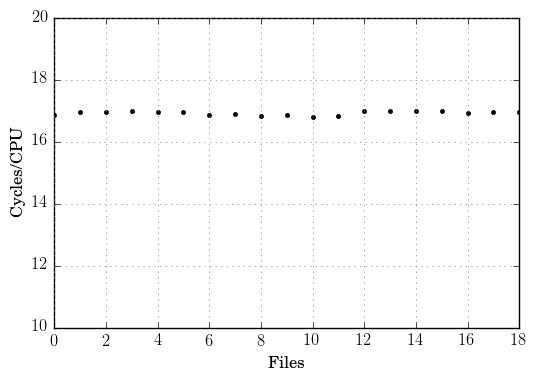

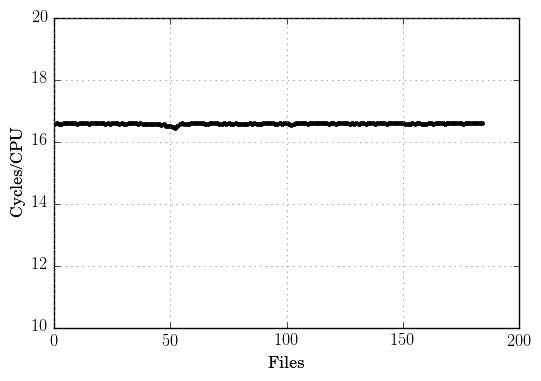

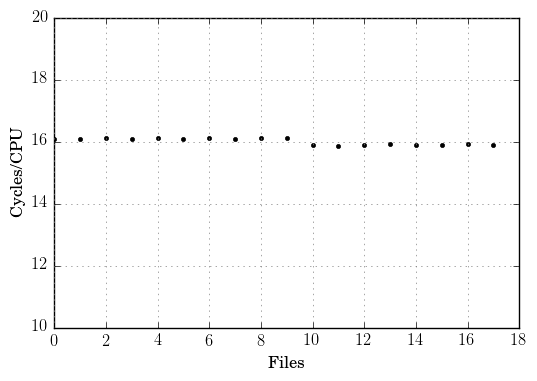

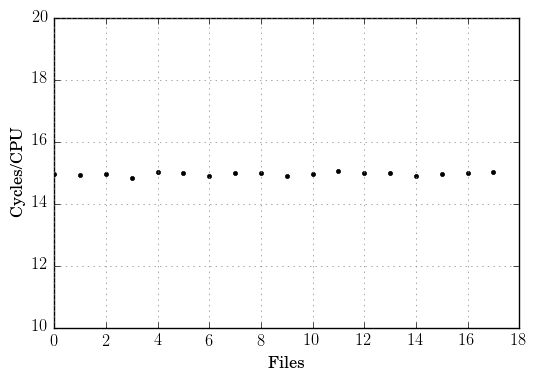

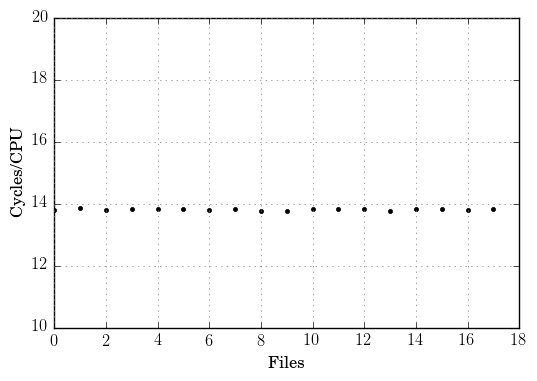

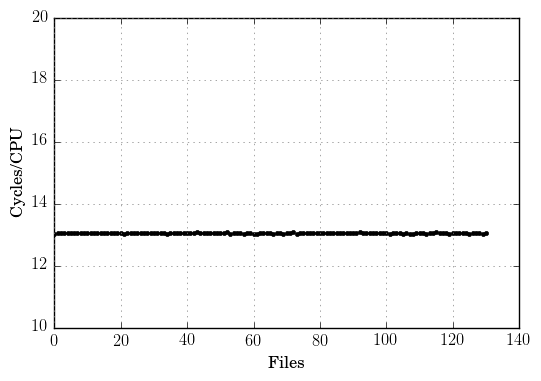

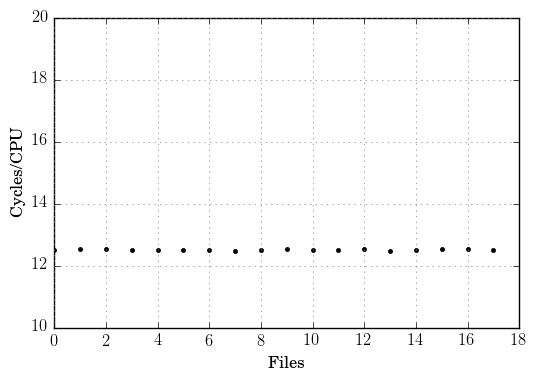

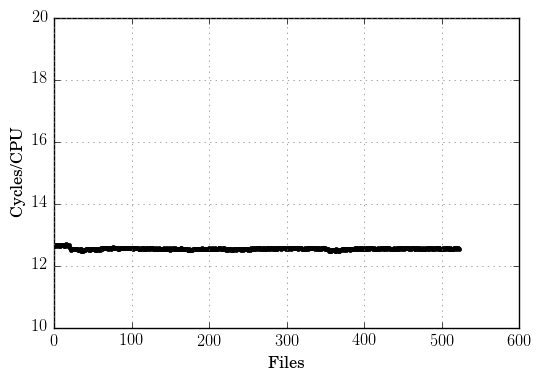

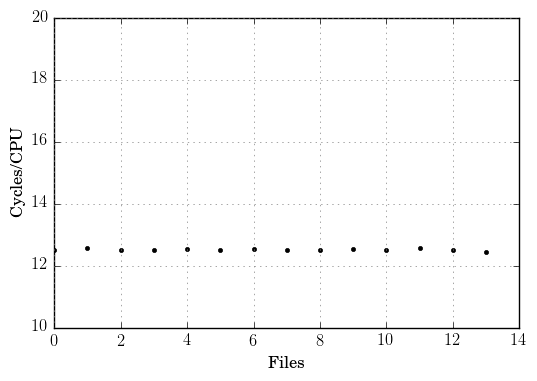

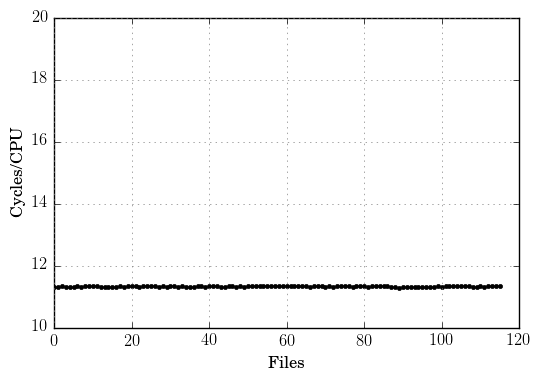

In [6]:
for run in fast_cpu_mrun.runs:
    plot.plot_cyc_v_cpu(run)
    plt.ylim([10,20])
    plt.show()

Since all the plots look good, we can output the average Cycles/CPU using the data for each and the value of the weighted delta-tracking threshold. We will normalize the averages to the case without weighted delta-tracking.

In [7]:
xf = []
yf = []
for run in fast_cpu_mrun.runs:
    xf.append(run.params['twdt'])
    yf.append(np.average(run.cyc_v_cpu()))
ynf = np.divide(np.array(yf),yf[xf.index(0.1)])

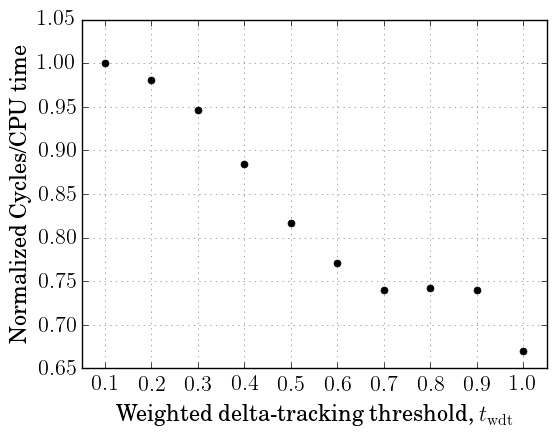

In [9]:
label_size=16
tick_size=16
save = True

plt.figure(figsize=(6,4.5))
plt.plot(xf,ynf,'.k',ms=10)
plt.xlabel('Weighted delta-tracking threshold, $t_{\mathrm{wdt}}$',
          fontsize=label_size)
plt.ylabel('Normalized Cycles/CPU time', fontsize=label_size)
plt.xticks(np.arange(0.1,1.1,0.1), fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim([0.05,1.05])
plt.ylim([0.65,1.05])
plt.gca().xaxis.labelpad = 10
plt.grid(which='both', color='0.5')
plt.gca().set_axisbelow(True)
if save:
    plt.savefig(img_dir + "fast_cyc_cpu.pdf",
               format = 'pdf', bbox_inches='tight')
plt.show()

Generate the table for the article.

In [10]:
df = pd.DataFrame({'\twdt': xf, '$(C/T)$': yf, '$(C/T)_{\text{norm}}$': ynf})
def col_form(x): 
    return '{:.2f}'.format(x)
def no_form(x):
    return str(x)
print df.to_latex(index=False, escape=False, formatters=[no_form,col_form,col_form])

\begin{tabular}{rrr}
\toprule
\twdt & $(C/T)$ & $(C/T)_{\text{norm}}$ \\
\midrule
  0.1 &   16.92 &                  1.00 \\
  0.2 &   16.58 &                  0.98 \\
  0.3 &   16.01 &                  0.95 \\
  0.4 &   14.96 &                  0.88 \\
  0.5 &   13.81 &                  0.82 \\
  0.6 &   13.05 &                  0.77 \\
  0.7 &   12.51 &                  0.74 \\
  0.8 &   12.55 &                  0.74 \\
  0.9 &   12.51 &                  0.74 \\
  1.0 &   11.32 &                  0.67 \\
\bottomrule
\end{tabular}



## Fast INF_FLX and INF_TOT

We will now upload all the actual data into a multi-run object. Note, this can take a while due to the large number of files.

In [11]:
base_dir = '~/repos/_wdt/wdt_data/'
t_wdt = np.linspace(0.1, 1, 10)

base = base_dir + 'fast_pincell/S0100/'
dirs = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in t_wdt]
params = [{'st': 0.1, 'twdt': val} for val in t_wdt]
fast_runs = wdt.MultiRun(dirs, params)

Uploaded 958 files.
Uploaded 486 files.
Uploaded 660 files.
Uploaded 465 files.
Uploaded 420 files.
Uploaded 784 files.
Uploaded 362 files.
Uploaded 366 files.
Uploaded 437 files.
Uploaded 492 files.


We want the corrected FOM, so we need to store the values of Cycles/CPU in each of the `SerpentRuns` in the `MultiRun` container. We will use the cycles/CPU values from the previous section stored in `y` and match them using the parameter `twdt`:

In [12]:
for run in fast_runs.runs:
    run.cyc_cpu = yf[xf.index(run.params['twdt'])]

Now we will look at each run to verify that the computer loading did not change to make sure our data is good.

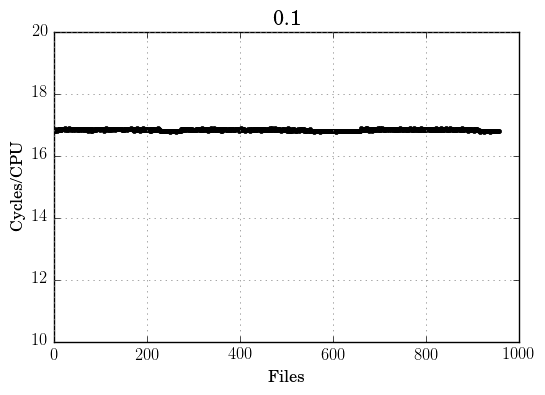

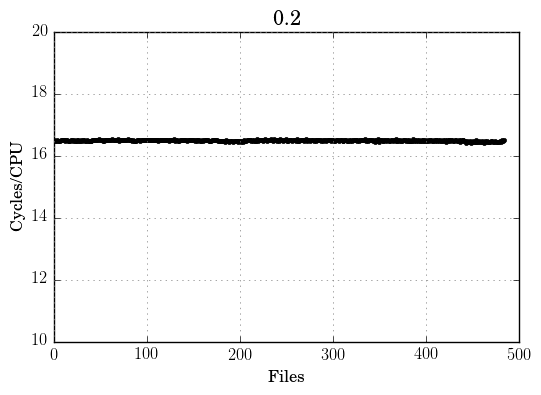

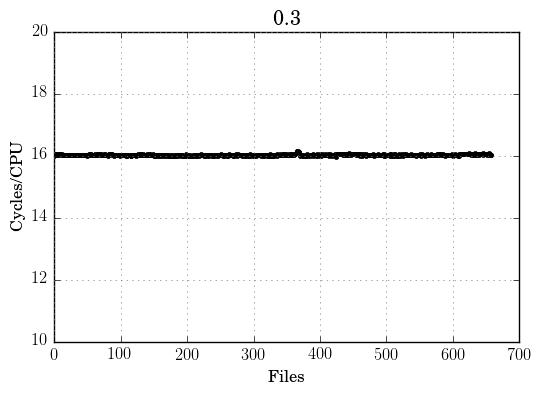

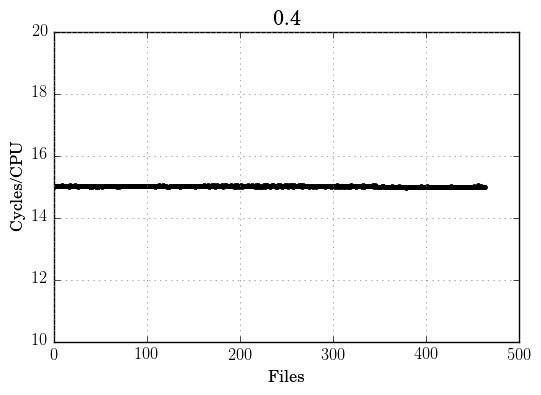

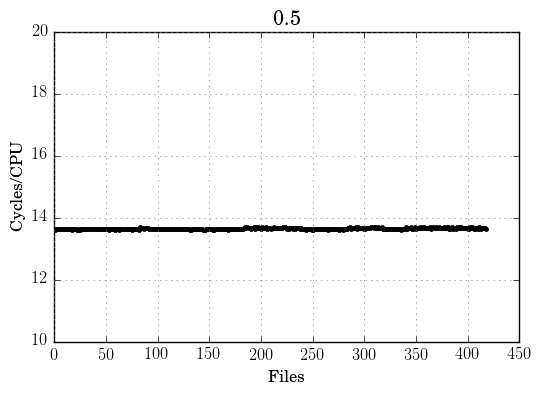

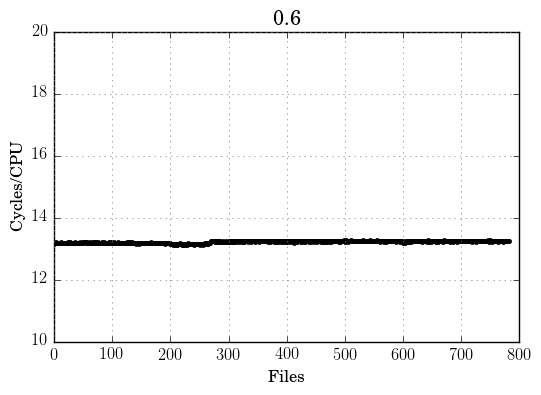

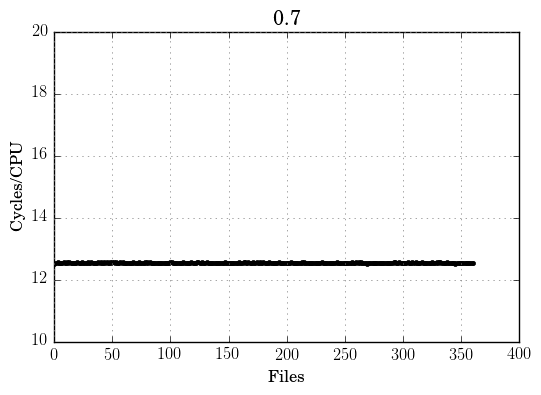

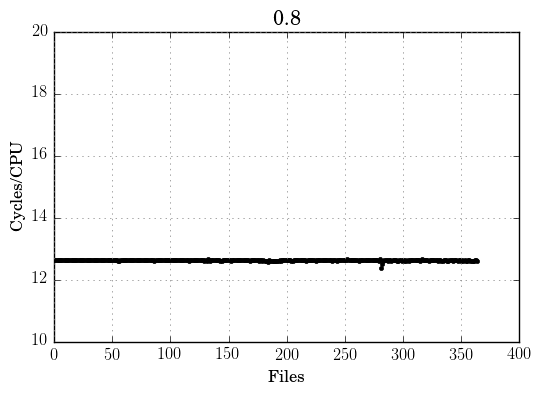

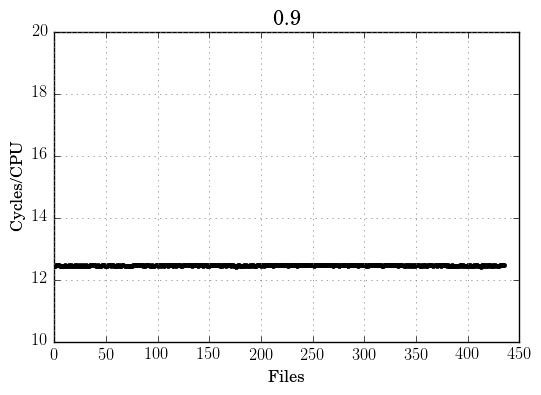

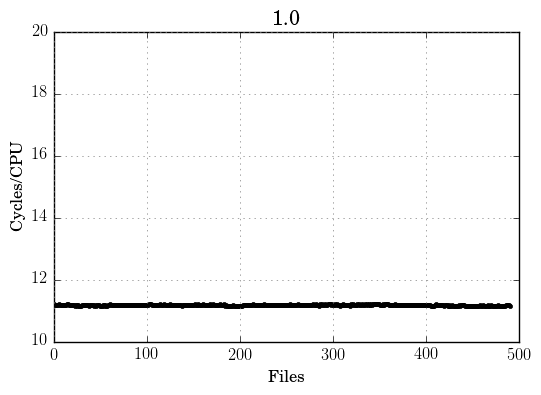

In [13]:
for run in fast_runs.runs:
    plot.plot_cyc_v_cpu(run)
    plt.title(str(run.params['twdt']))
    plt.ylim(10,20)
    plt.show()

Now we can plot the FOM ratios for the final value of the FOM vs the base case where $t_{\mathrm{wdt}}=0.1$. Note that we specify the parameter to plot on the $x$-axis and the value of the base case. These can be any of the parameters that all of the runs have.

To speed things up we'll make a quick function to plot these.

In [14]:
def fast_runs_plot(label, grp):
    plot.plot_ratio(fast_runs, label_size=16, font_size=16, param='twdt',base=0.1, label=label, grp=grp,
                   corr = True, ms=10)
    ylabel = 'FOM$_{\mathrm{norm}}$'
    plt.ylabel(ylabel)
    plt.gca().xaxis.labelpad = 10
    
    plt.xlabel('Weighted delta-tracking threshold, $t_{\mathrm{wdt}}$')

Some formatting for the publication is also included. The value `fom_p` determines the rounding of the FOM, by dividing the FOM values by $10^{p}$.

INF_FLX1


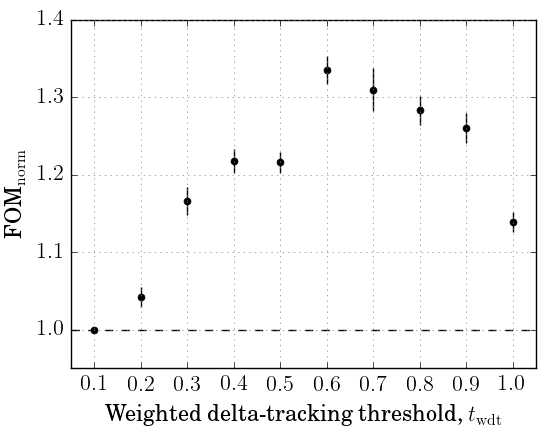

\begin{tabular}{rrrrr}
\toprule
 twdt &  fom & fom_err &      r &  r_err \\
\midrule
  0.1 &  141 &       1 &  1.000 &  0.000 \\
  0.2 &  146 &       1 &  1.042 &  0.013 \\
  0.3 &  164 &       2 &  1.166 &  0.018 \\
  0.4 &  171 &       2 &  1.217 &  0.015 \\
  0.5 &  171 &       1 &  1.216 &  0.013 \\
  0.6 &  188 &       2 &  1.335 &  0.018 \\
  0.7 &  184 &       4 &  1.310 &  0.028 \\
  0.8 &  180 &       2 &  1.283 &  0.019 \\
  0.9 &  177 &       2 &  1.261 &  0.020 \\
  1.0 &  160 &       1 &  1.138 &  0.013 \\
\bottomrule
\end{tabular}

INF_TOT1


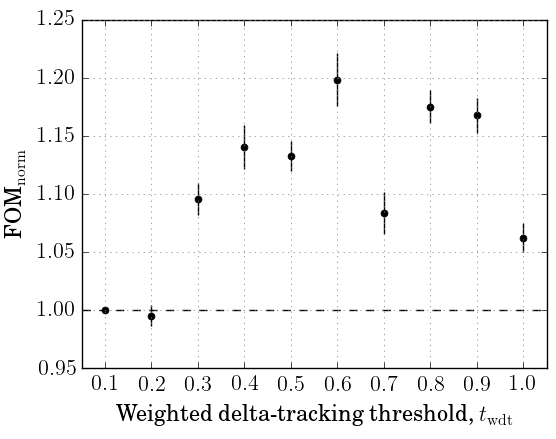

\begin{tabular}{rrrrr}
\toprule
 twdt &   fom & fom_err &      r &  r_err \\
\midrule
  0.1 &  1141 &       8 &  1.000 &  0.000 \\
  0.2 &  1136 &       7 &  0.995 &  0.009 \\
  0.3 &  1250 &      13 &  1.095 &  0.014 \\
  0.4 &  1301 &      20 &  1.140 &  0.019 \\
  0.5 &  1292 &      12 &  1.132 &  0.013 \\
  0.6 &  1367 &      24 &  1.198 &  0.023 \\
  0.7 &  1237 &      19 &  1.084 &  0.018 \\
  0.8 &  1341 &      14 &  1.175 &  0.014 \\
  0.9 &  1332 &      15 &  1.168 &  0.015 \\
  1.0 &  1212 &      12 &  1.062 &  0.013 \\
\bottomrule
\end{tabular}



In [19]:
labels= ['INF_FLX','INF_TOT']
grps= [1]
save = True
fom_p=4
for label in labels:
    for grp in grps:
        print label + str(grp)
        f = plt.figure(figsize=(6,4.5))
        fast_runs_plot(label, grp)
        plt.gca().lines
        plt.gca().set_axisbelow = True
        if save:
            plt.savefig(img_dir + "fast_" + label.lower() + "_grp_"+str(grp)+".pdf",
                           format = 'pdf', bbox_inches='tight')
        plt.show()
        print plot.ratio_table(fast_runs, fom_p=fom_p, rat_p=3, label=label, grp=grp,
                           param='twdt', base=0.1, corr=True).to_latex(index=False, escape=False, column_format='rrrrr')

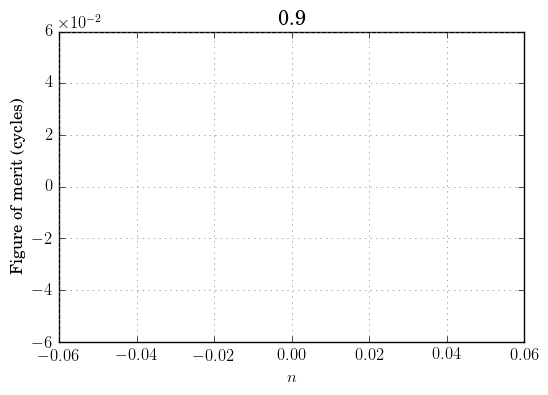

In [95]:
n = 8
plot.plot_fom_corr(fast_runs.runs[n], label='INF_FLX',grp=2)
plt.title(fast_runs.runs[n].params['twdt'])
plt.show()

In [104]:
fast_runs.runs[8].get_error('INF_FLX',grp=2)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

# PWR

## PWR Cycles/CPU

Upload all the data for the PWR in the repository for cycles/CPU into a single `MultiRun` object.

In [13]:
t_wdt = np.linspace(0.1,1,10)

base = wdt_cpu_dir + 'pwr/S0100/'
dirs = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in t_wdt]
params = [{'st': 0.1, 'twdt': val} for val in t_wdt]
pwr_cpu_mrun = wdt.MultiRun(dirs, params)

Uploaded 49 files.
Uploaded 49 files.
Uploaded 47 files.
Uploaded 39 files.
Uploaded 41 files.
Uploaded 38 files.
Uploaded 49 files.
Uploaded 38 files.
Uploaded 33 files.
Uploaded 29 files.


We want to look at all the graphs real fast just to make sure nothing weird went on with the computer loading. Plots are generated using the plotter object.

In [3]:
plot = fom_plot.Plotter()

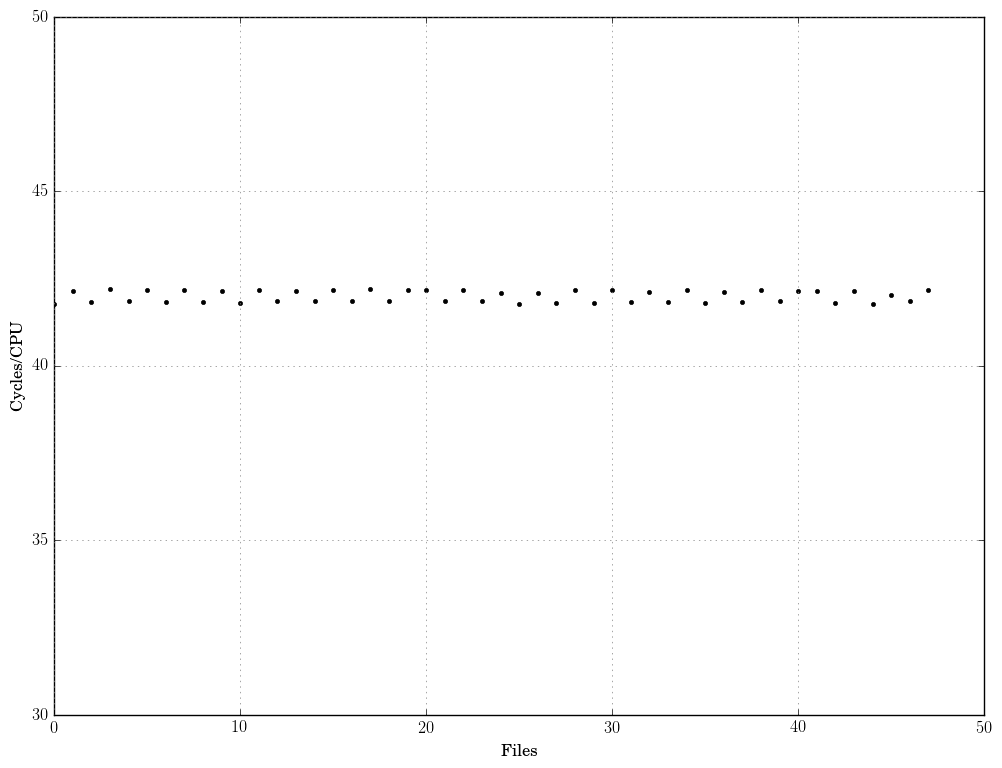

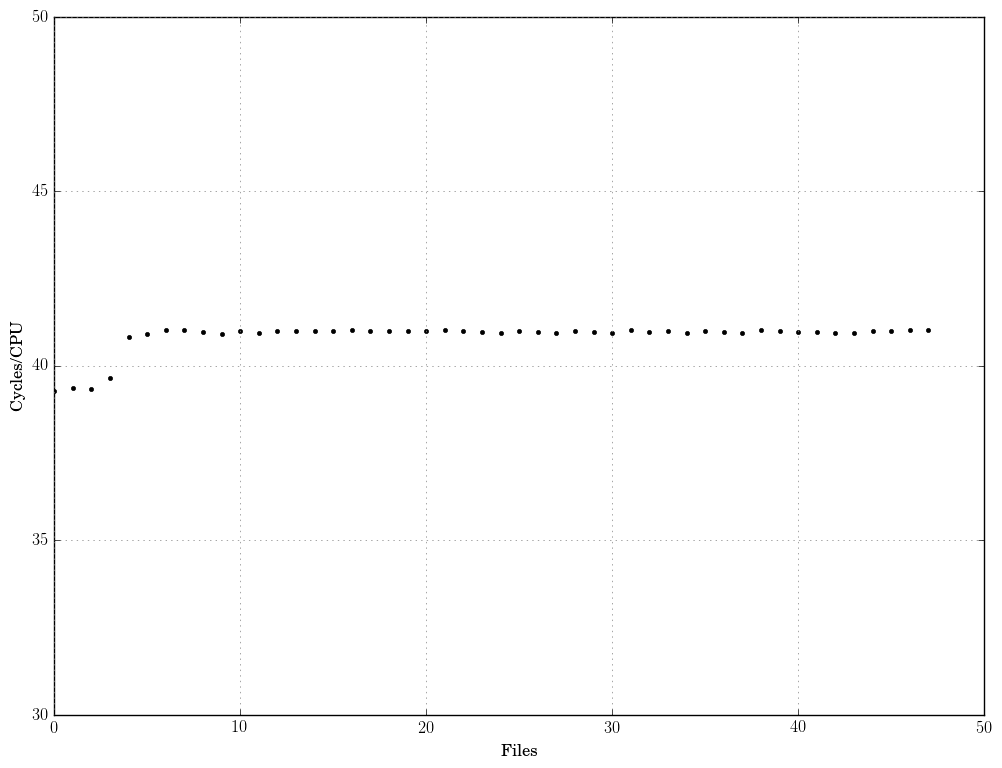

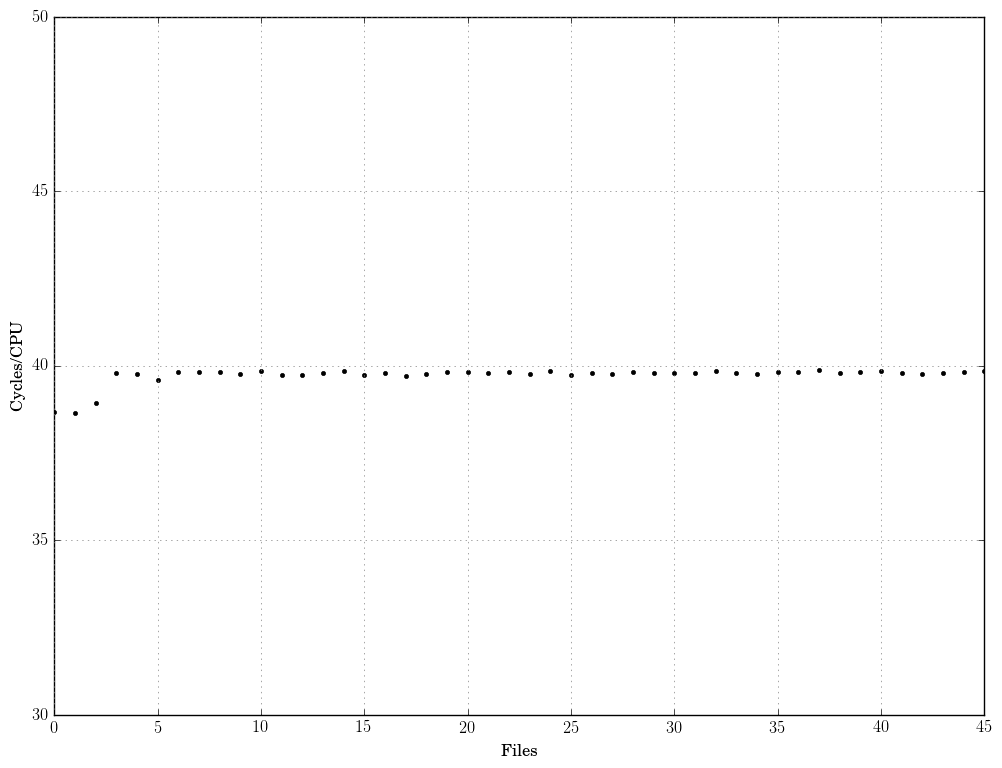

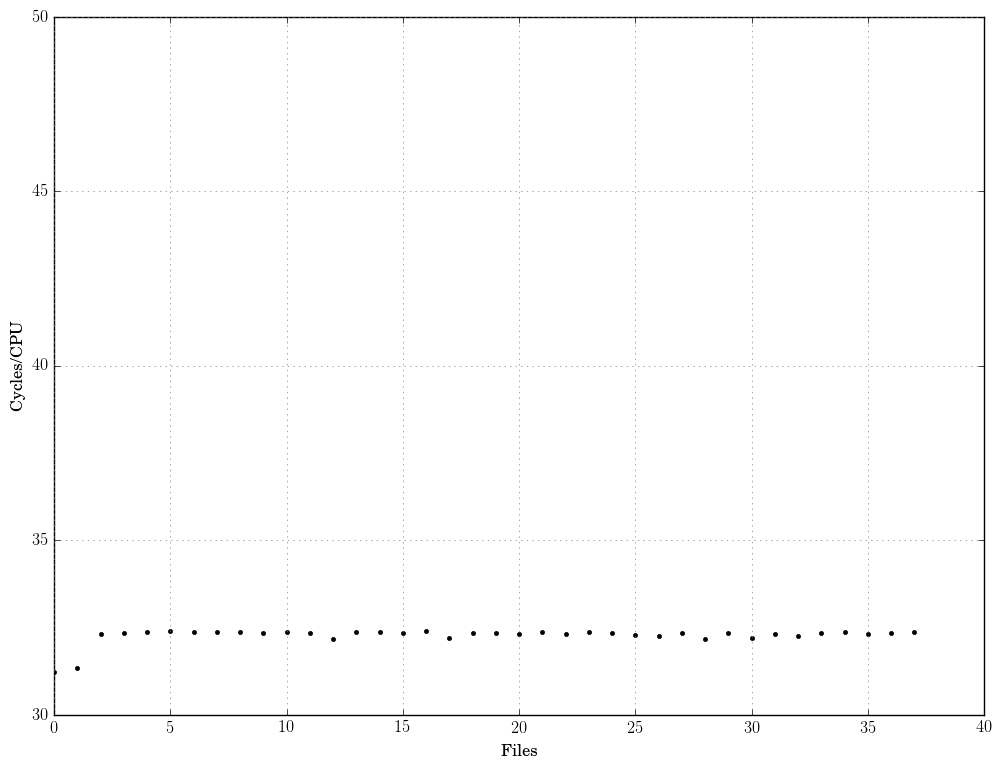

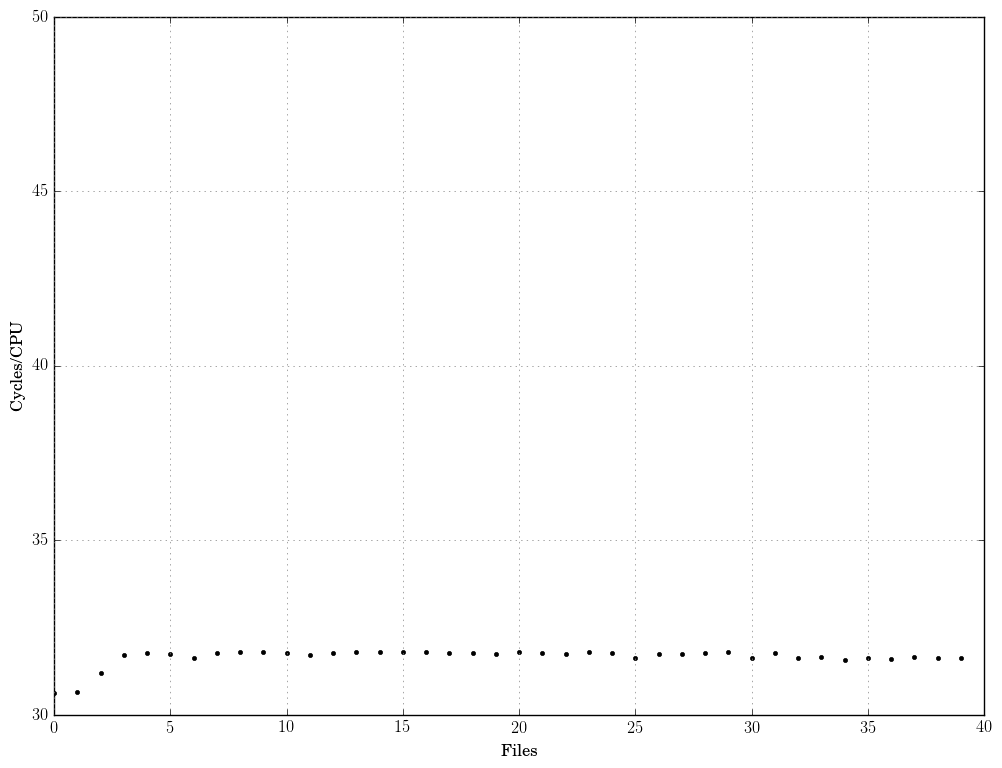

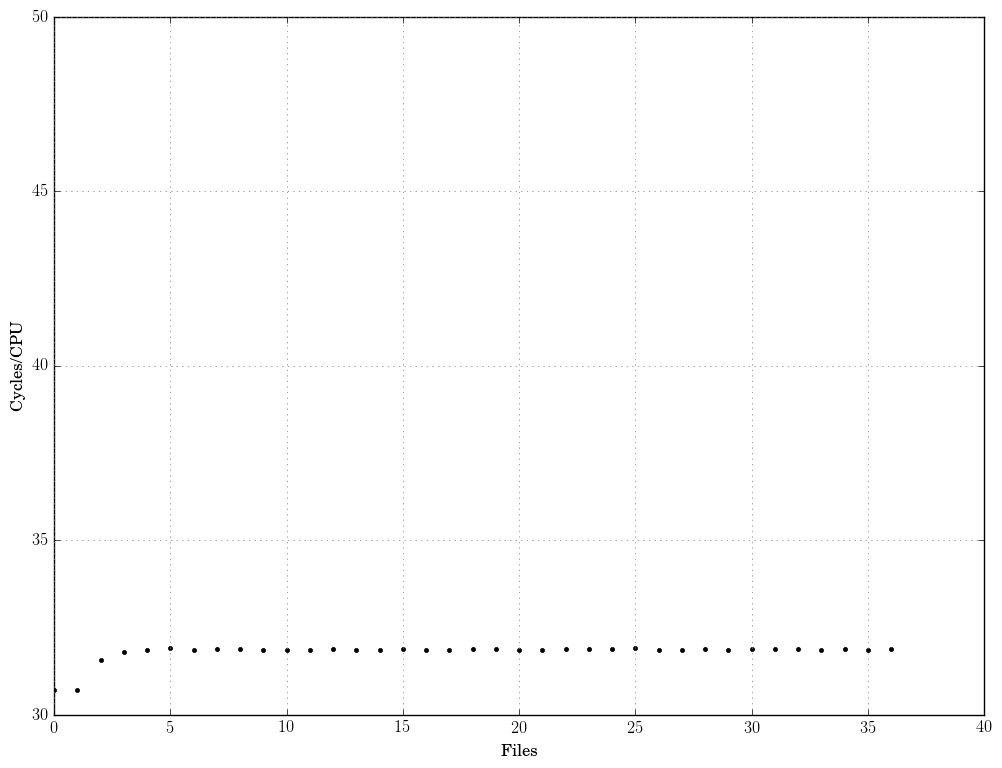

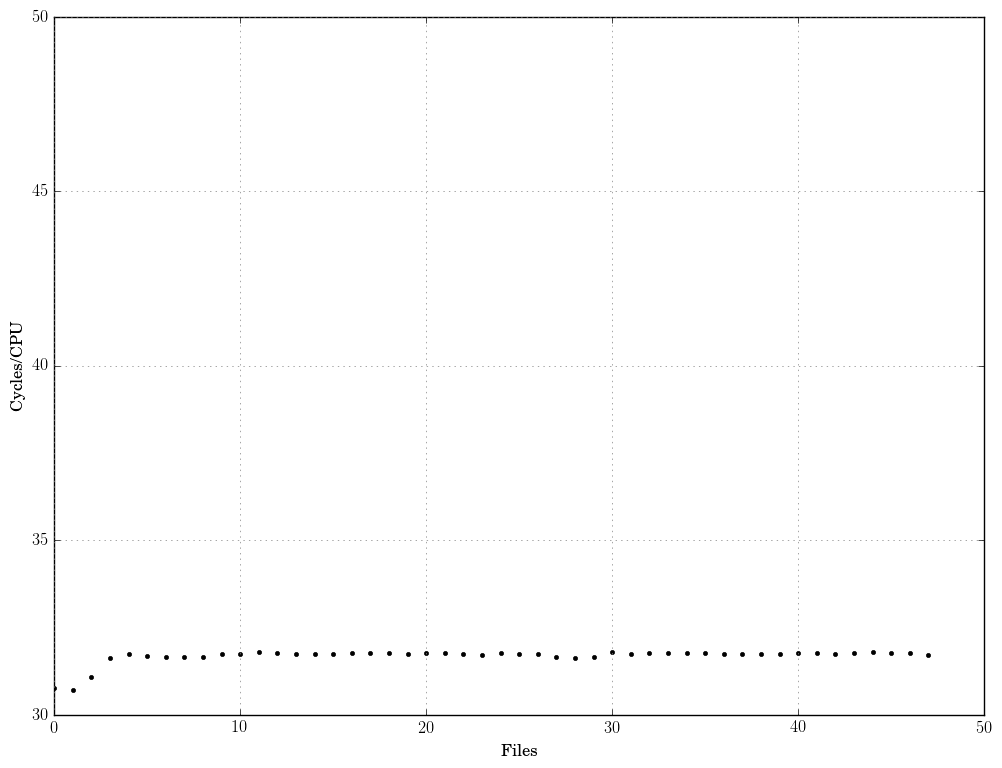

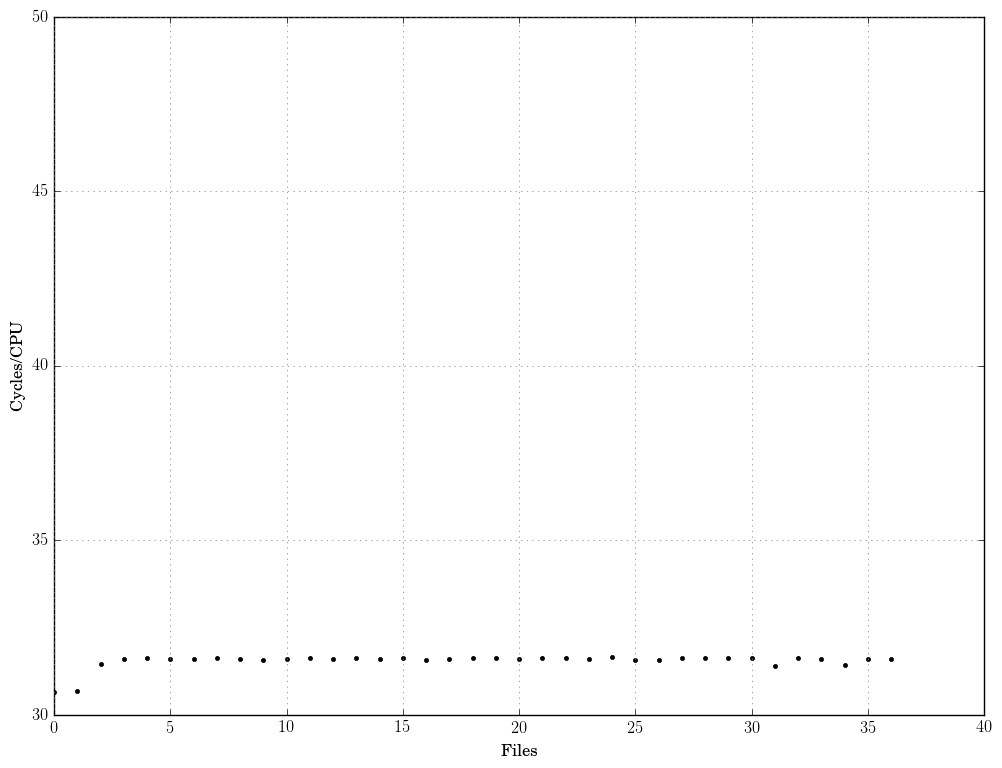

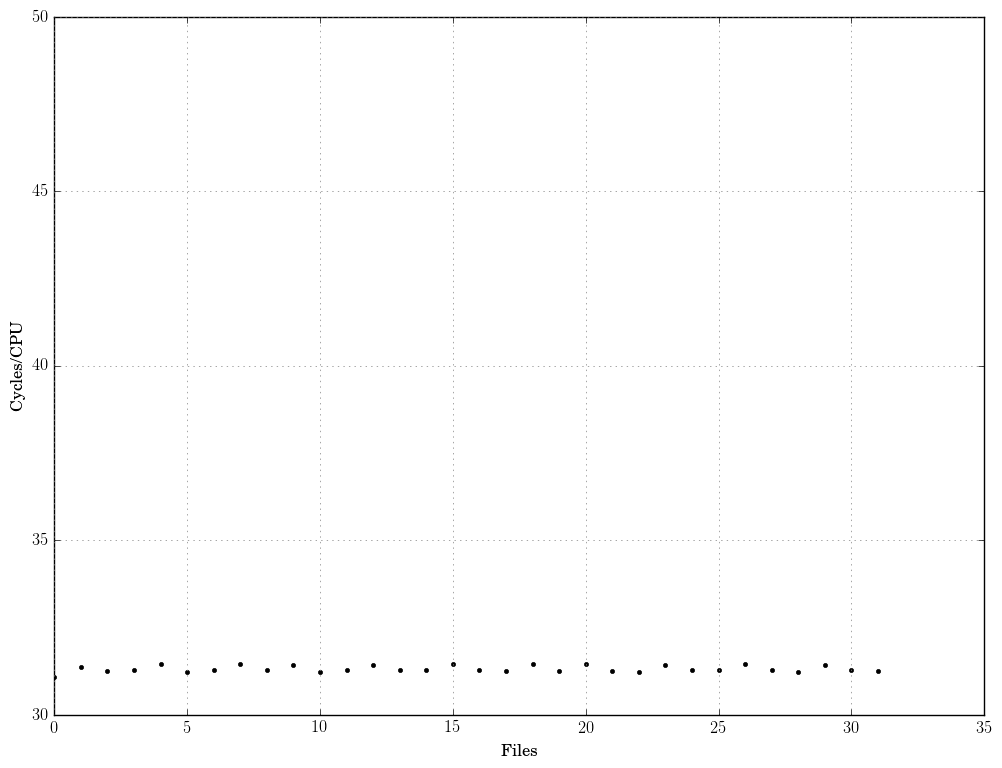

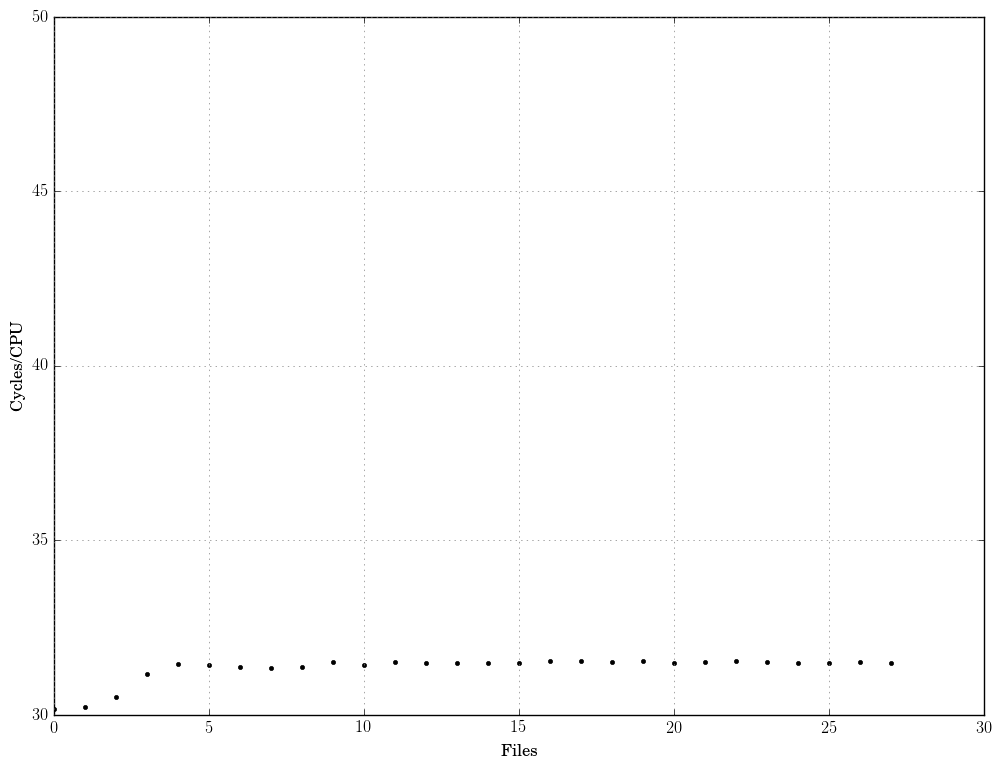

In [5]:
for run in pwr_cpu_mrun.runs:
    plot.plot_cyc_v_cpu(run)
    plt.ylim(30,50)
    plt.show()

Since all the plots look good, we can output the average Cycles/CPU using the data for each and the value of the weighted delta-tracking threshold. We will normalize the averages to the case without weighted delta-tracking.

In [14]:
x = []
y = []
for run in pwr_cpu_mrun.runs:
    x.append(run.params['twdt'])
    y.append(np.average(run.cyc_v_cpu()))
yn = np.divide(np.array(y),y[x.index(0.1)])

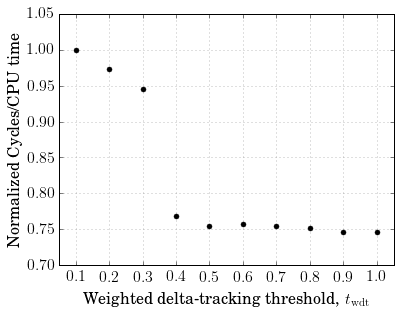

In [15]:
label_size=16
tick_size=16
save = True
plt.figure(figsize=(6,4.5))
plt.plot(x,yn,'.k',ms=10)
plt.xlabel('Weighted delta-tracking threshold, $t_{\mathrm{wdt}}$',
          fontsize=label_size)
plt.ylabel('Normalized Cycles/CPU time', fontsize=label_size)
plt.xticks(np.arange(0.1,1.1,0.1), fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim([0.05,1.05])
plt.ylim([0.7,1.05])
plt.gca().xaxis.labelpad = 10
plt.grid(which='both', color='0.5')
plt.gca().set_axisbelow(True)
if save:
    plt.savefig(img_dir + "pwr_cyc_cpu.pdf",
               format = 'pdf', bbox_inches='tight')
plt.show()

Generate the table for the article.

In [8]:
df = pd.DataFrame({'\twdt': x, '$(C/T)$': y, '$(C/T)_{\text{norm}}$': yn})
def col_form(x): 
    return '{:.2f}'.format(x)
def no_form(x):
    return str(x)
print df.to_latex(index=False, escape=False, formatters=[no_form,col_form,col_form])

\begin{tabular}{rrr}
\toprule
\twdt & $(C/T)$ & $(C/T)_{\text{norm}}$ \\
\midrule
  0.1 &   42.00 &                  1.00 \\
  0.2 &   40.85 &                  0.97 \\
  0.3 &   39.73 &                  0.95 \\
  0.4 &   32.27 &                  0.77 \\
  0.5 &   31.66 &                  0.75 \\
  0.6 &   31.79 &                  0.76 \\
  0.7 &   31.68 &                  0.75 \\
  0.8 &   31.54 &                  0.75 \\
  0.9 &   31.31 &                  0.75 \\
  1.0 &   31.33 &                  0.75 \\
\bottomrule
\end{tabular}



## PWR INF_FLX

We will now upload all the actual data into a multi-run object. Note, this can take a while due to the large number of files.

In [10]:
base_dir = '~/repos/_wdt/wdt_data/'
t_wdt = np.linspace(0.1, 1, 10)

base = base_dir + 'pwr/S0100/'
dirs = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in t_wdt]
params = [{'st': 0.1, 'twdt': val} for val in t_wdt]
pwr_runs = wdt.MultiRun(dirs, params)

Uploaded 1450 files.
Uploaded 630 files.
Uploaded 630 files.
Uploaded 582 files.
Uploaded 937 files.
Uploaded 911 files.
Uploaded 780 files.
Uploaded 1410 files.
Uploaded 1002 files.
Uploaded 403 files.


We want the corrected FOM, so we need to store the values of Cycles/CPU in each of the `SerpentRuns` in the `MultiRun` container. We will use the cycles/CPU values from the previous section stored in `y` and match them using the parameter `twdt`:

In [38]:
for run in pwr_runs.runs:
    run.cyc_cpu = y[x.index(run.params['twdt'])]

Now we will look at each run to verify that the computer loading did not change to make sure our data is good.

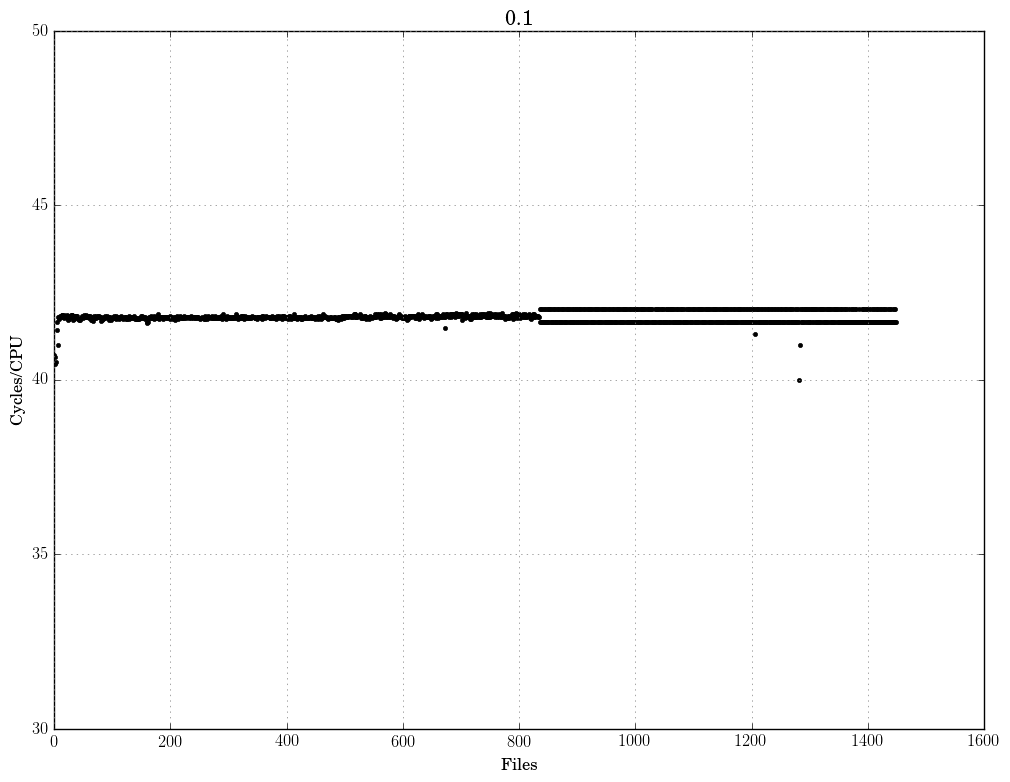

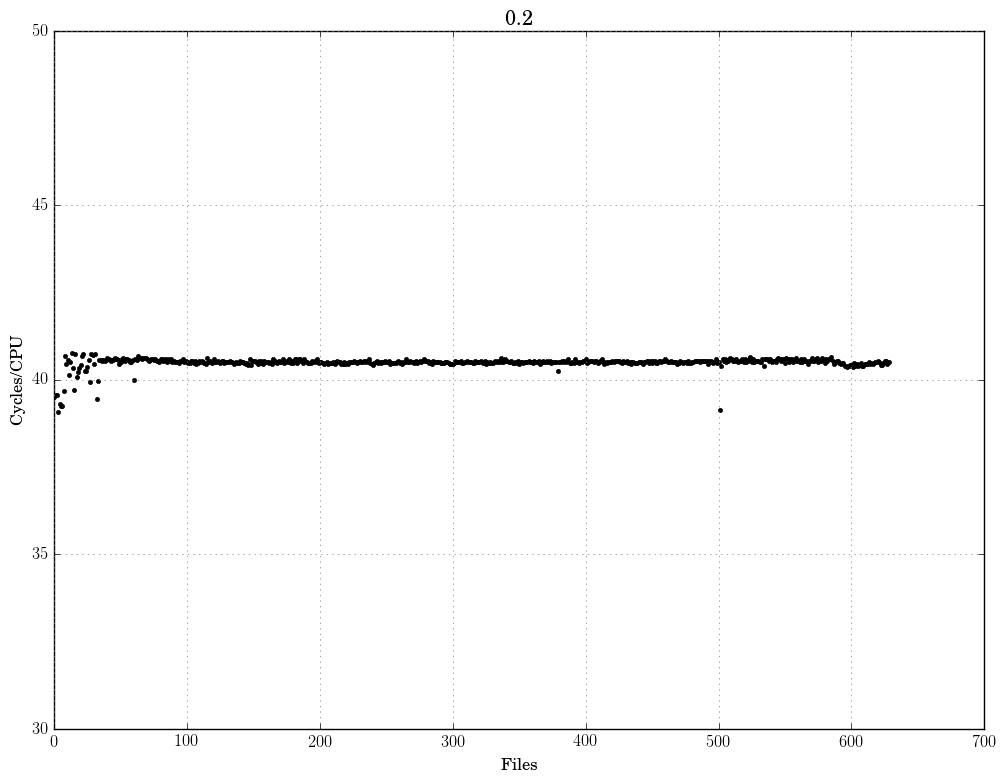

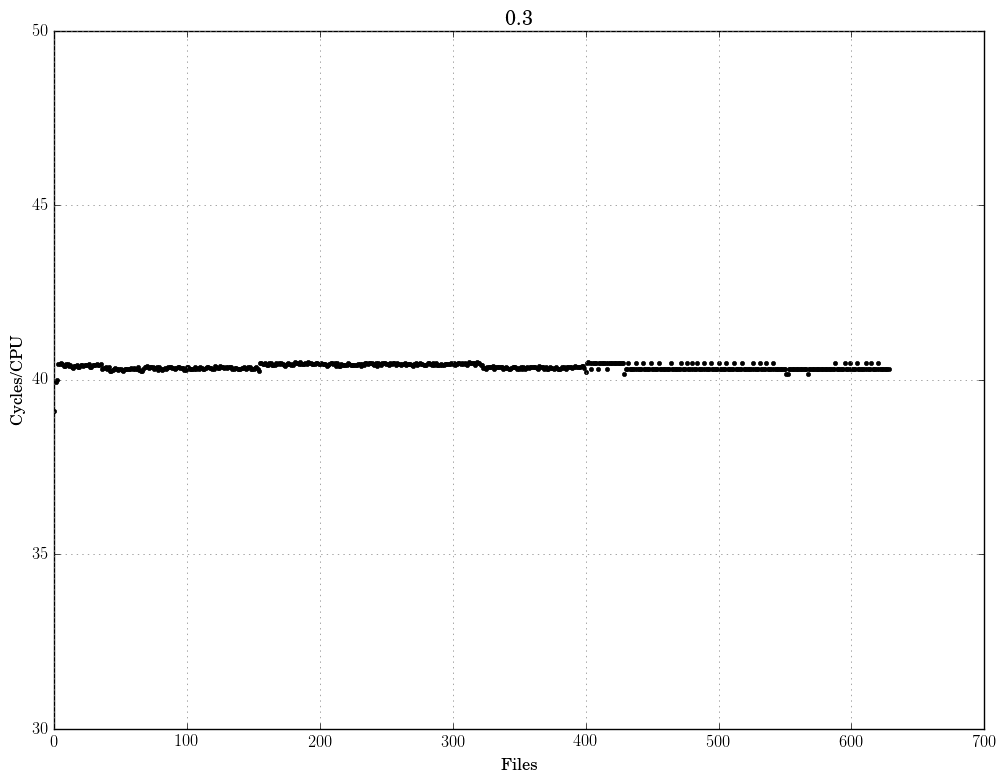

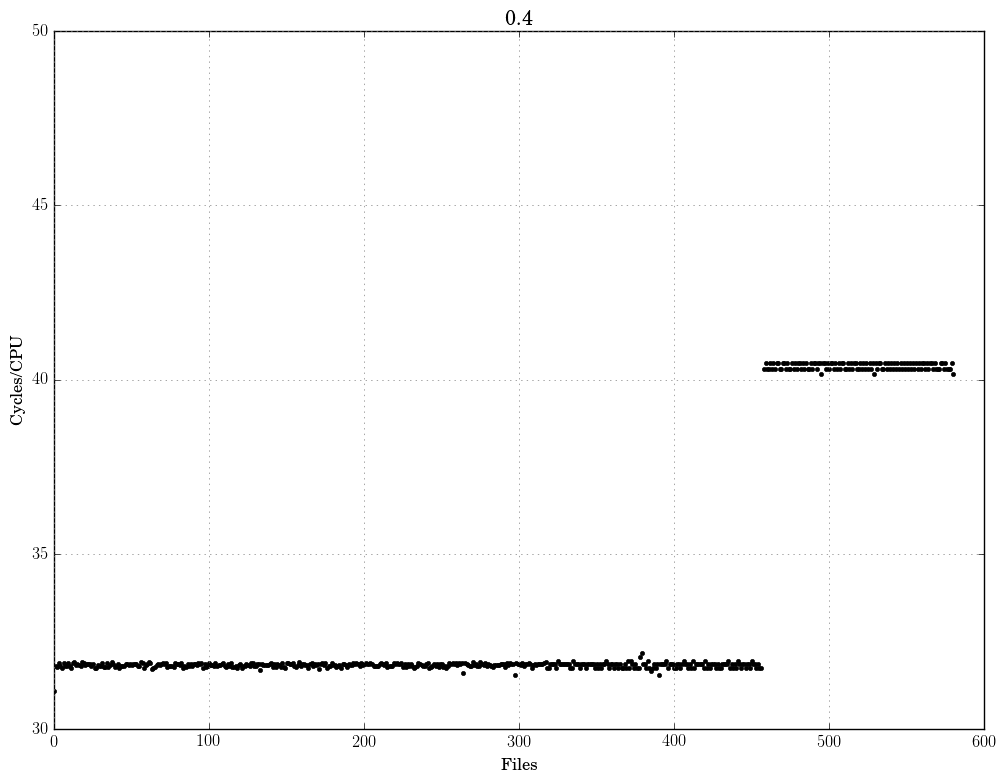

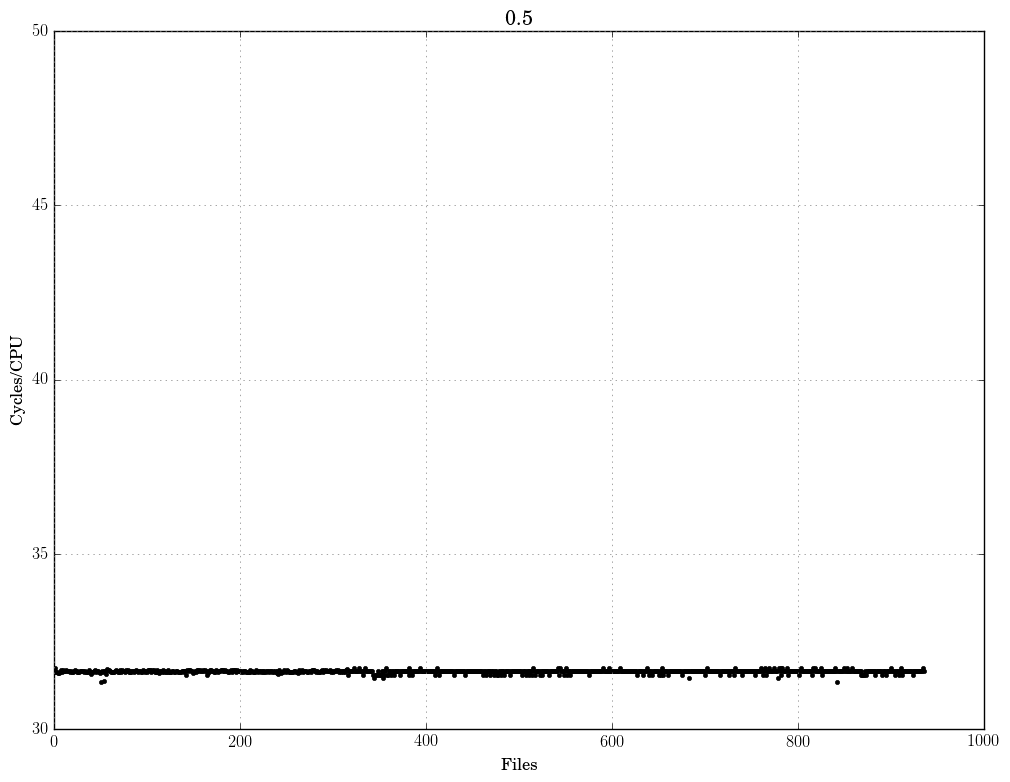

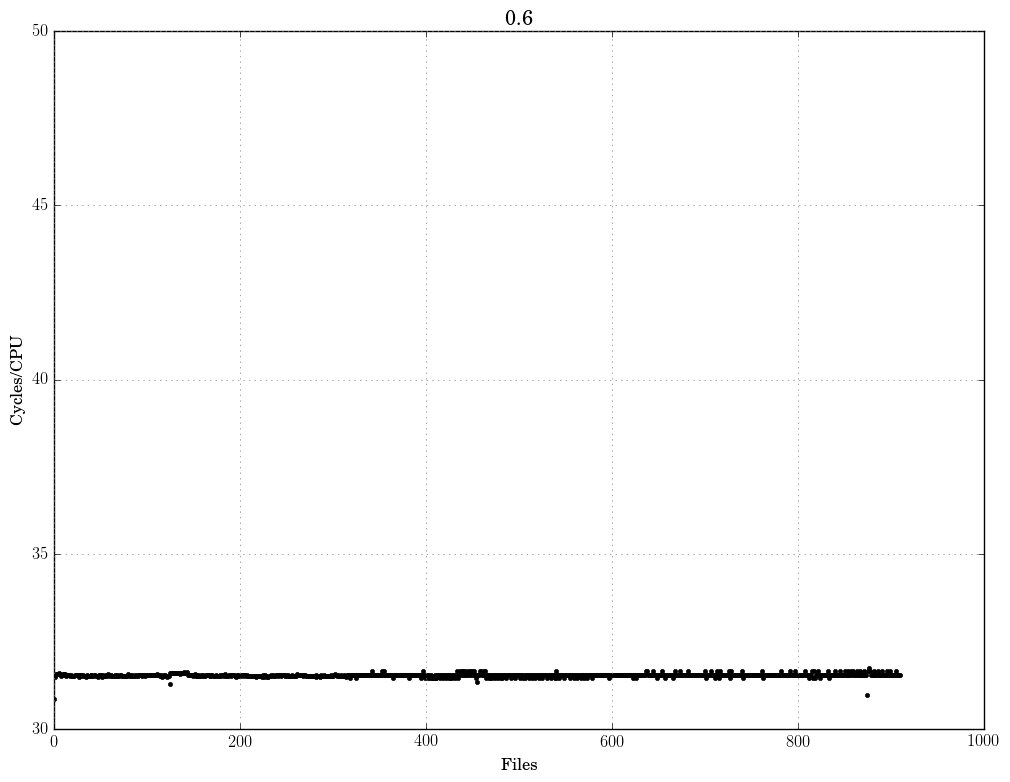

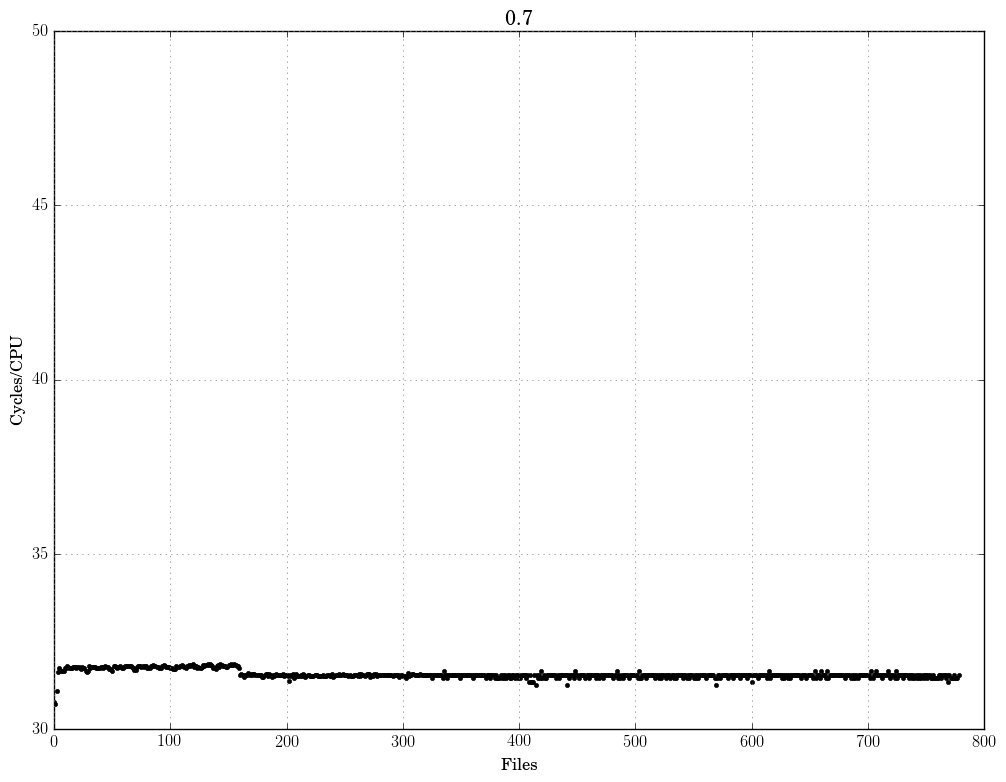

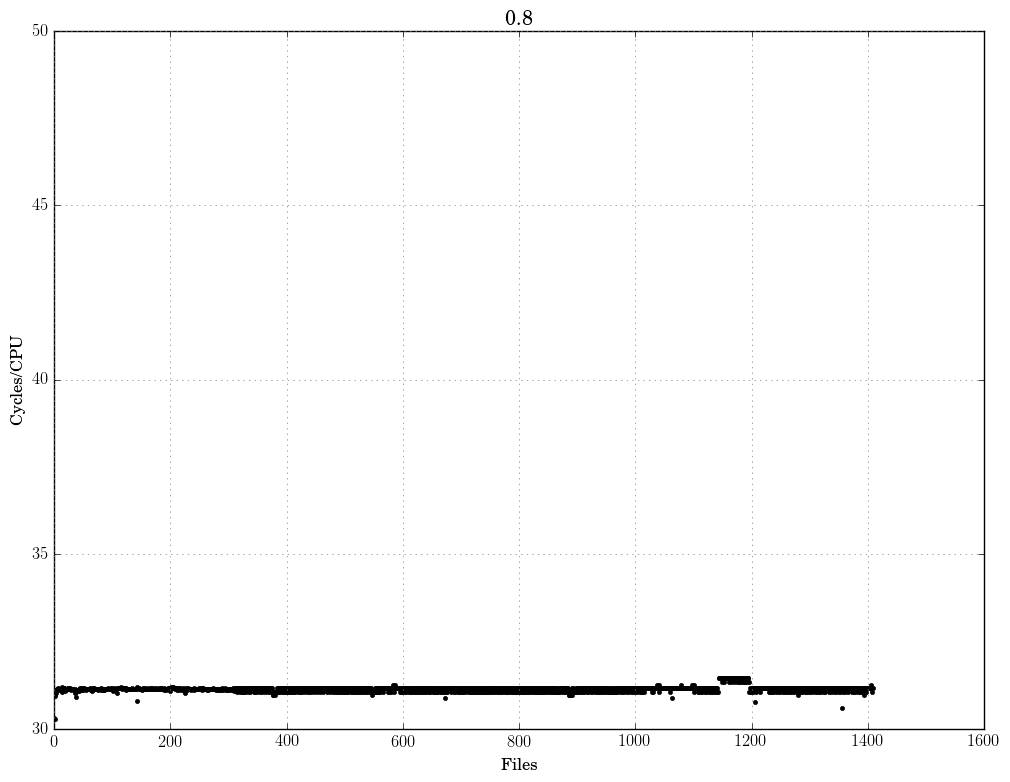

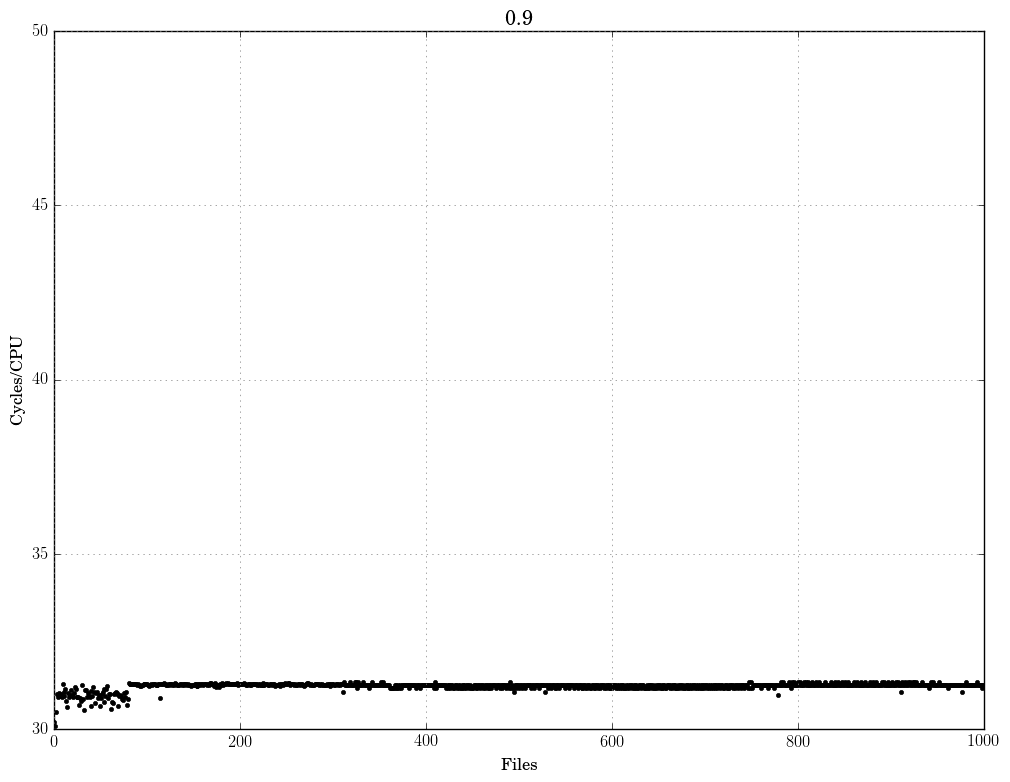

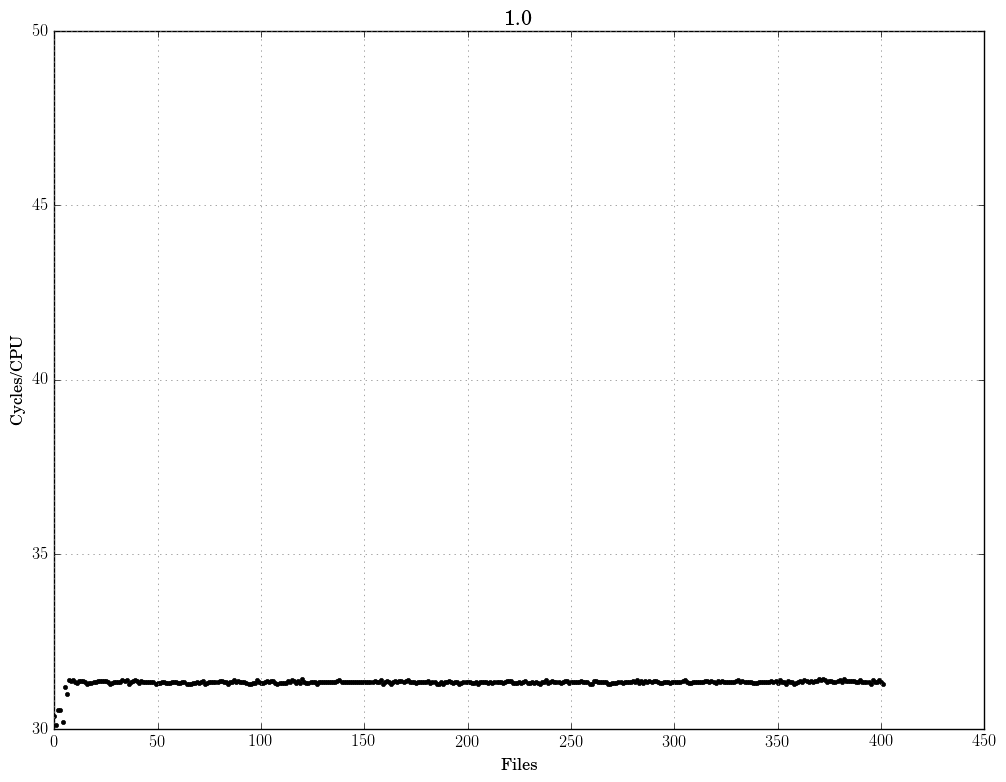

In [15]:
for run in pwr_runs.runs:
    plot.plot_cyc_v_cpu(run)
    plt.title(str(run.params['twdt']))
    plt.ylim(30,50)
    plt.show()

It looks like the plot for $t_{\mathrm{wdt}} = 0.4$ had a change in loading so we will cap that plot. We can see where it occured by looking at a plot of FOM.

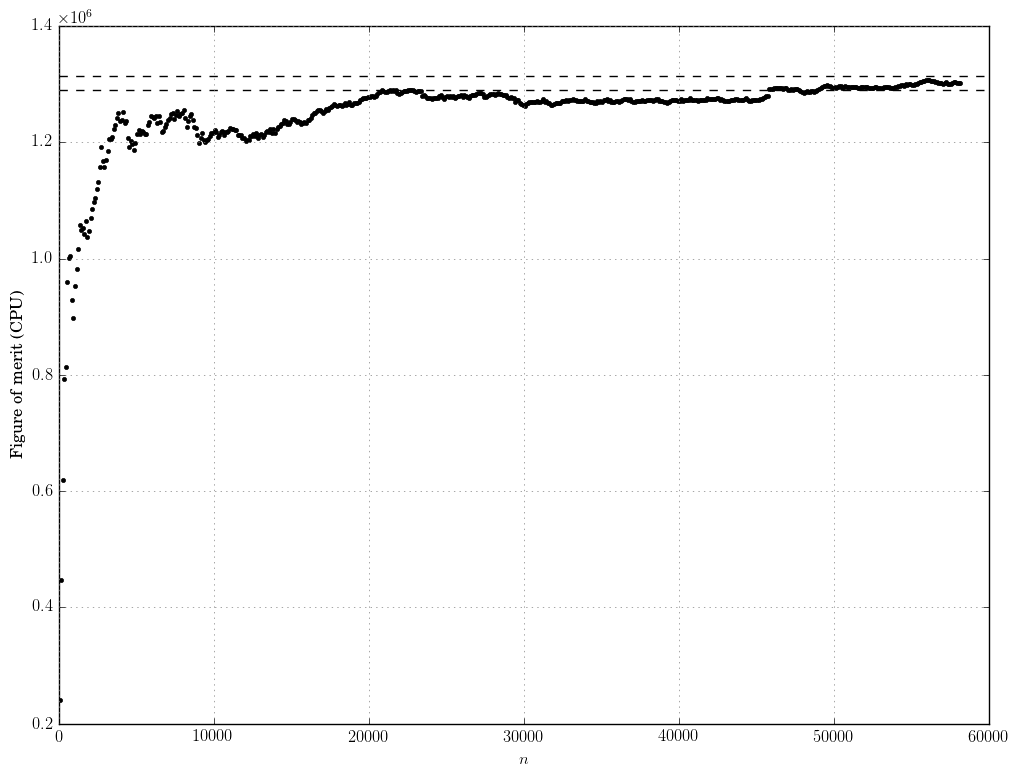

In [17]:
plot.plot_fom(pwr_runs.runs[x.index(0.4)], label = 'INF_FLX', grp=1)

The jump occurs around $n=45000$ so we can cap it.

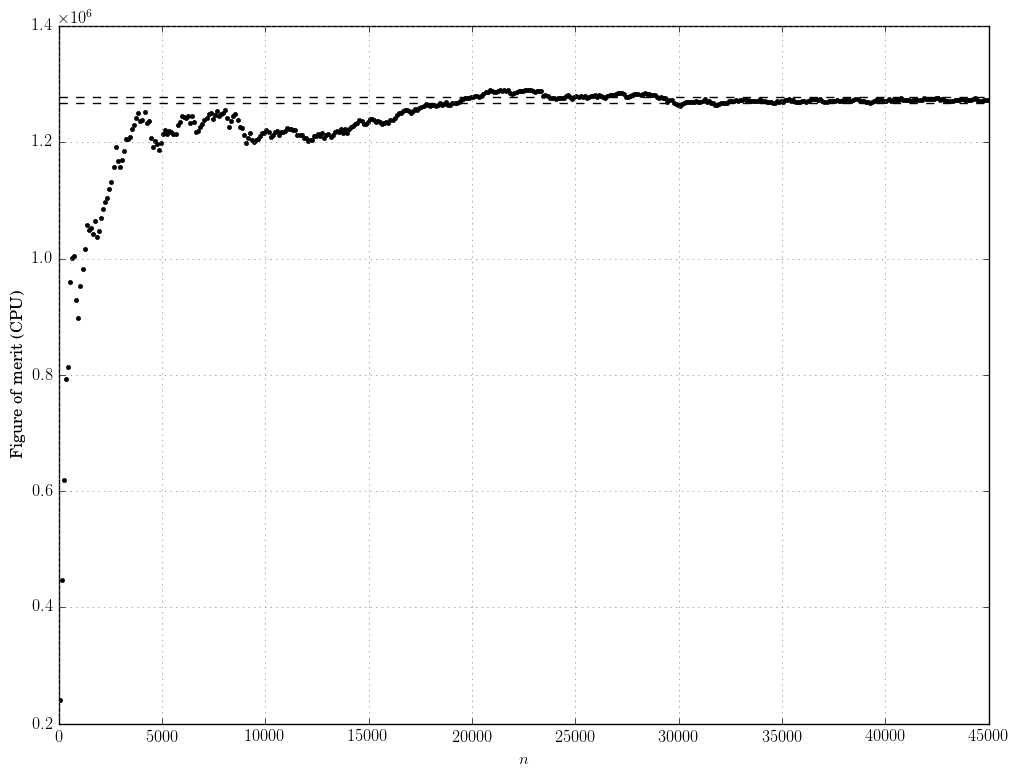

In [50]:
plot.plot_fom(pwr_runs.runs[x.index(0.4)], label = 'INF_FLX', grp=1,
             cap = 45000)
plt.show()

Now we can plot the FOM ratios for the final value of the FOM vs the base case where $t_{\mathrm{wdt}}=0.1$. Note that we specify the parameter to plot on the $x$-axis and the value of the base case. These can be any of the parameters that all of the runs have.

To speed things up we'll make a quick function to plot these.

In [46]:
def pwr_runs_plot(label, grp):
    plot.plot_ratio(pwr_runs, label_size=16, font_size=16, param='twdt',base=0.1, label=label, grp=grp,
                   corr = True, caps=[(0.4,45000)], ms=10)
    ylabel = 'FOM$_{\mathrm{norm}}$'
    plt.ylabel(ylabel)
    plt.gca().xaxis.labelpad = 10
    
    plt.xlabel('Weighted delta-tracking threshold, $t_{\mathrm{wdt}}$')

Some formatting for the publication is also included. The value `fom_p` determines the rounding of the FOM, by dividing the FOM values by $10^{p}$.

INF_TOT1


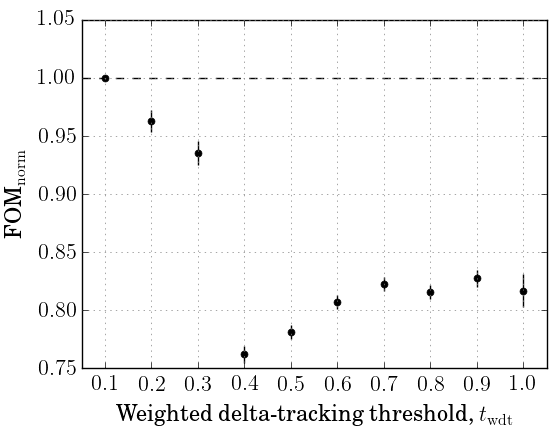

\begin{tabular}{rrrrr}
\toprule
 twdt &   fom & fom_err &      r &  r_err \\
\midrule
  0.1 &  1475 &      10 &  1.000 &  0.000 \\
  0.2 &  1420 &      11 &  0.963 &  0.010 \\
  0.3 &  1380 &      12 &  0.935 &  0.010 \\
  0.4 &  1124 &       8 &  0.762 &  0.007 \\
  0.5 &  1152 &       5 &  0.781 &  0.006 \\
  0.6 &  1190 &       4 &  0.807 &  0.006 \\
  0.7 &  1214 &       5 &  0.823 &  0.006 \\
  0.8 &  1203 &       4 &  0.816 &  0.006 \\
  0.9 &  1221 &       7 &  0.827 &  0.007 \\
  1.0 &  1205 &      20 &  0.817 &  0.014 \\
\bottomrule
\end{tabular}

INF_TOT2


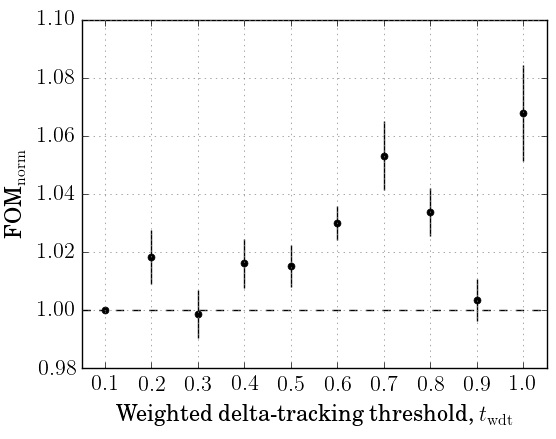

\begin{tabular}{rrrrr}
\toprule
 twdt &  fom & fom_err &      r &  r_err \\
\midrule
  0.1 &  811 &       3 &  1.000 &  0.000 \\
  0.2 &  826 &       7 &  1.018 &  0.009 \\
  0.3 &  810 &       6 &  0.999 &  0.008 \\
  0.4 &  824 &       6 &  1.016 &  0.008 \\
  0.5 &  823 &       5 &  1.015 &  0.007 \\
  0.6 &  835 &       4 &  1.030 &  0.006 \\
  0.7 &  854 &       9 &  1.053 &  0.012 \\
  0.8 &  838 &       6 &  1.034 &  0.008 \\
  0.9 &  814 &       5 &  1.003 &  0.007 \\
  1.0 &  866 &      13 &  1.068 &  0.017 \\
\bottomrule
\end{tabular}



In [62]:
labels= ['INF_TOT']
grps= [1,2]
save = False
fom_p=4
for label in labels:
    for grp in grps:
        print label + str(grp)
        f = plt.figure(figsize=(6,4.5))
        pwr_runs_plot(label, grp)
        plt.gca().lines
        plt.gca().set_axisbelow = True
        if save:
            plt.savefig(img_dir + "pwr_" + label.lower() + "_grp_"+str(grp)+".pdf",
                           format = 'pdf', bbox_inches='tight')
        plt.show()
        print plot.ratio_table(pwr_runs, fom_p=fom_p, rat_p=3, label=label, grp=grp,
                           param='twdt', base=0.1, corr=True, caps=[(0.4,45000)]).to_latex(index=False, escape=False, column_format='rrrrr')

# Homogenous Fuel Element

In [3]:
base_dir = '~/repos/_wdt/wdt_data/'
t_wdt = np.linspace(0.1,1,10)

base = base_dir + 'homog/S0100/'
dirs = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in t_wdt]
params = [{'st': 0.1, 'twdt': val} for val in t_wdt]
homog_runs = wdt.MultiRun(dirs, params)

Uploaded 569 files.
Uploaded 426 files.
Uploaded 186 files.
Uploaded 302 files.
Uploaded 583 files.
Uploaded 305 files.
Uploaded 308 files.
Uploaded 554 files.
Uploaded 423 files.
Uploaded 198 files.


In [4]:
t_wdt = [0.1*float(n) for n in range(1,11)]

base = wdt_cpu_dir + 'homog/S0100/'
dirs = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in t_wdt]
params = [{'st': 0.1, 'twdt': val} for val in t_wdt]
homog_cpu_runs = wdt.MultiRun(dirs, params)

Uploaded 19 files.
Uploaded 19 files.
Uploaded 21 files.
Uploaded 57 files.
Uploaded 23 files.
Uploaded 115 files.
Uploaded 24 files.
Uploaded 117 files.
Uploaded 19 files.
Uploaded 18 files.


In [5]:
xh = []
yh = []
for run in homog_cpu_runs.runs:
    xh.append(run.params['twdt'])
    yh.append(np.average(run.cyc_v_cpu()))
ynh = np.divide(np.array(yh),yh[xh.index(0.1)])

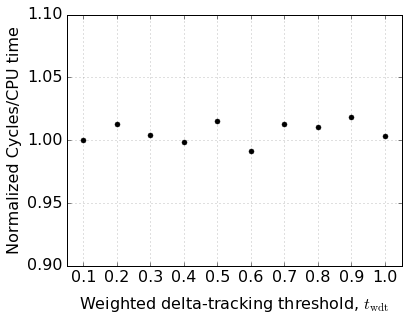

In [6]:
label_size=16
tick_size=16
save = False
plt.figure(figsize=(6,4.5))
plt.plot(xh,ynh,'.k',ms=10)
plt.xlabel('Weighted delta-tracking threshold, $t_{\mathrm{wdt}}$',
          fontsize=label_size)
plt.ylabel('Normalized Cycles/CPU time', fontsize=label_size)
plt.xticks(np.arange(0.1,1.1,0.1), fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim([0.05,1.05])
plt.ylim([0.9,1.1])
plt.gca().xaxis.labelpad = 10
plt.grid(which='both', color='0.5')
plt.gca().set_axisbelow(True)
if save:
    plt.savefig(img_dir + "homog_cyc_cpu.pdf",
               format = 'pdf', bbox_inches='tight')
plt.show()

In [17]:
df = pd.DataFrame({'\twdt': xh, '$(C/T)$': yh, '$(C/T)_{\text{norm}}$': ynh})
def col_form(x): 
    return '{:.3f}'.format(x)
def no_form(x):
    return str(x)
print df.to_latex(index=False, escape=False, formatters=[no_form,col_form,col_form])

\begin{tabular}{rrr}
\toprule
\twdt & $(C/T)$ & $(C/T)_{\text{norm}}$ \\
\midrule
  0.1 &  10.540 &                 1.000 \\
  0.2 &  10.672 &                 1.013 \\
  0.3 &  10.586 &                 1.004 \\
  0.4 &  10.523 &                 0.998 \\
  0.5 &  10.703 &                 1.016 \\
  0.6 &  10.447 &                 0.991 \\
  0.7 &  10.673 &                 1.013 \\
  0.8 &  10.654 &                 1.011 \\
  0.9 &  10.738 &                 1.019 \\
  1.0 &  10.572 &                 1.003 \\
\bottomrule
\end{tabular}



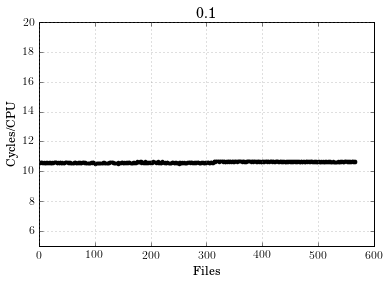

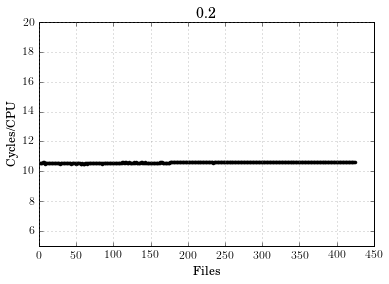

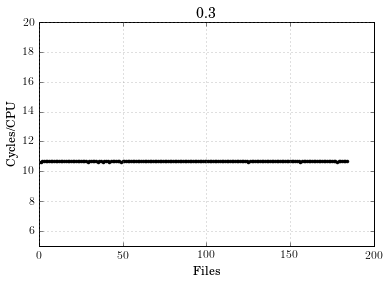

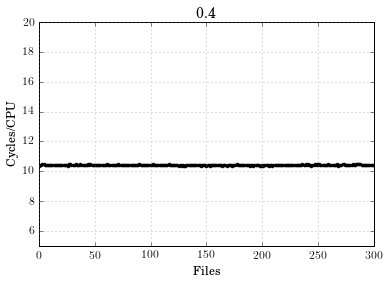

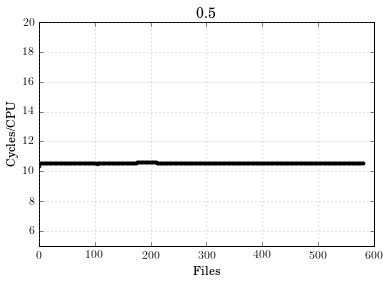

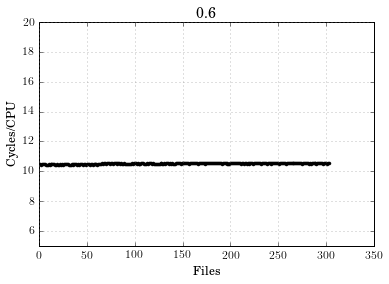

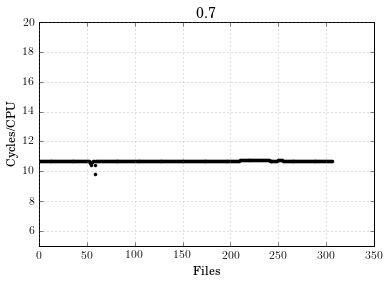

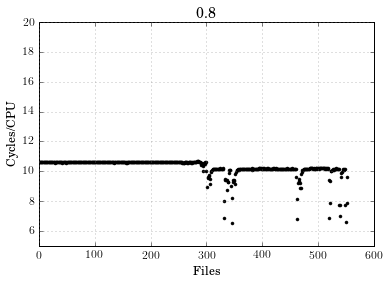

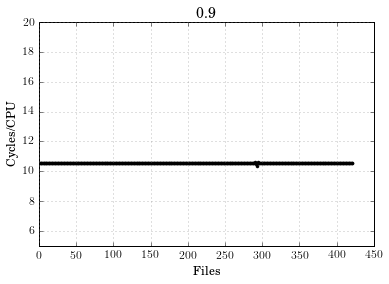

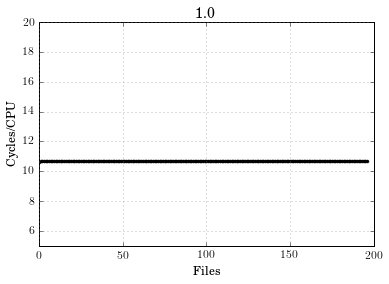

In [26]:
for run in homog_runs.runs:
    plot.plot_cyc_v_cpu(run)
    plt.title(str(run.params['twdt']))
    plt.ylim(5,20)
    plt.show()

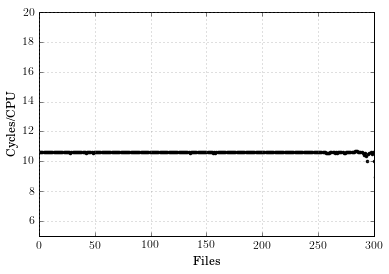

In [24]:
plot.plot_cyc_v_cpu(homog_runs.runs[7])
plt.ylim(5,20)
plt.xlim(0,300)
plt.show()

In [25]:
homog_runs.runs[7].cycles[300]

30050

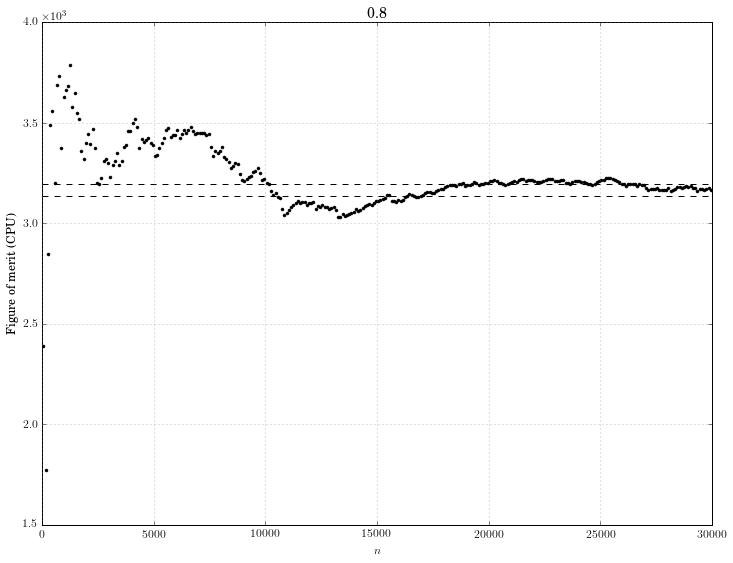

In [26]:
n=7
plt.figure(figsize=(12,9))
plot.plot_fom(homog_runs.runs[n], label = 'INF_FLX', grp=range(1,7),
             cap=30050)
plt.title(homog_runs.runs[n].params['twdt'])
plt.show()

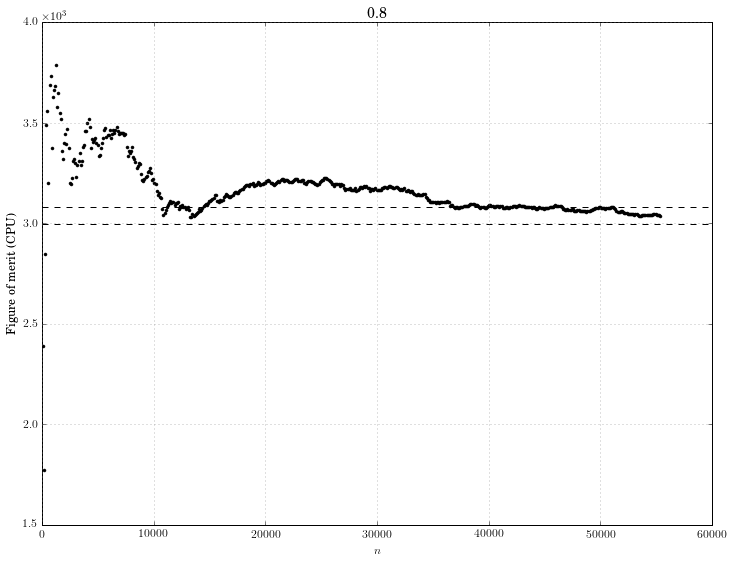

In [22]:
n=7
plt.figure(figsize=(12,9))
plot.plot_fom(homog_runs.runs[n], label = 'INF_FLX', grp=range(1,7))
plt.title(homog_runs.runs[n].params['twdt'])
plt.show()

In [8]:
for i, run in enumerate(homog_runs.runs):
    run.cyc_cpu = yh[i]

[1, 2, 3, 4, 5, 6]
\begin{tabular}{rrrrr}
\toprule
 twdt &   fom & fom_err &      r &  r_err \\
\midrule
  0.1 &  3065 &      34 &  1.000 &  0.000 \\
  0.2 &  3085 &      23 &  1.006 &  0.013 \\
  0.3 &  3088 &      36 &  1.007 &  0.016 \\
  0.4 &  3254 &      17 &  1.062 &  0.013 \\
  0.5 &  3180 &      29 &  1.037 &  0.015 \\
  0.6 &  3065 &      31 &  1.000 &  0.015 \\
  0.7 &  2999 &      32 &  0.978 &  0.015 \\
  0.8 &  3232 &      55 &  1.054 &  0.021 \\
  0.9 &  3058 &      18 &  0.998 &  0.013 \\
  1.0 &  3162 &      43 &  1.031 &  0.018 \\
\bottomrule
\end{tabular}



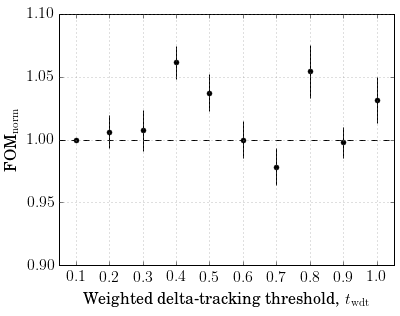

[7, 8, 9, 10, 11]
\begin{tabular}{rrrrr}
\toprule
 twdt &   fom & fom_err &      r &  r_err \\
\midrule
  0.1 &  7099 &      95 &  1.000 &  0.000 \\
  0.2 &  6934 &      49 &  0.977 &  0.015 \\
  0.3 &  6901 &      40 &  0.972 &  0.014 \\
  0.4 &  7238 &      41 &  1.020 &  0.015 \\
  0.5 &  7323 &      28 &  1.032 &  0.014 \\
  0.6 &  7138 &      86 &  1.006 &  0.018 \\
  0.7 &  7022 &      34 &  0.989 &  0.014 \\
  0.8 &  7076 &      86 &  0.997 &  0.018 \\
  0.9 &  7156 &      38 &  1.008 &  0.014 \\
  1.0 &  7149 &      43 &  1.007 &  0.015 \\
\bottomrule
\end{tabular}



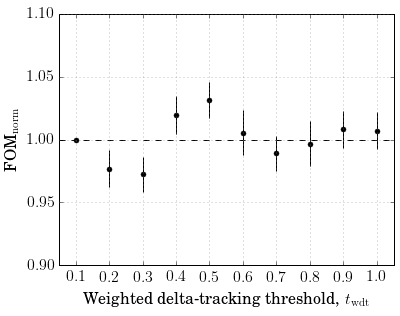

In [14]:
label='INF_FLX'
fom_p = 0
for g in [range(1,7), range(7,12)]:
    print g
    f = plt.figure(figsize=(6,4.5))
    plot.plot_ratio(homog_runs, label_size=16, font_size=16, base=0.1, label=label, grp=[g],
                   param='twdt',corr=True, ms=10,caps=[(0.8,25050)])
    ylabel = 'FOM$_{\mathrm{norm}}$'
    plt.ylabel(ylabel)
    plt.gca().xaxis.labelpad = 10
    plt.gca().set_axisbelow = True
    plt.xlabel('Weighted delta-tracking threshold, $t_{\mathrm{wdt}}$')
    plt.ylim([0.9,1.1])
    group = 1 if g[0] == 1 else 2
    plt.savefig(img_dir + "homog_" + label.lower() + "_grp_"+str(group)+".pdf",
                           format = 'pdf', bbox_inches='tight')
    print plot.ratio_table(homog_runs, fom_p=fom_p, rat_p=3, label=label, grp=g,
                           param='twdt', base=0.1, corr=True, caps=[(0.8,25050)]).to_latex(index=False, escape=False, column_format='rrrrr')
    plt.show()